In [51]:
import pandas as pd

df = pd.read_csv('https://github.com/rel8edto/PublicDatasets/raw/main/Football/mdollingDataOut.csv')
df

,ticketid,person,age,seat,team,eventType,date,gate,products,target,Softdrink,Beer,Hotdog,Book
0,61,Bethel Romy,32,A18,NaN,NaN,25-Jan,A,"[Softdrink,Book]",False,True,False,False,True
1,103,Moreen Caren,29,A18,NaN,NaN,20-Feb,A,"[Softdrink,Hotdog]",False,True,False,True,False
2,240,Ty Jenessa,33,A18,NaN,NaN,2-Feb,A,"[Softdrink,Hotdog]",False,True,False,True,False
3,303,Bethel Romy,32,A18,NaN,NaN,8-Feb,A,"[Book,Beer]",False,False,True,False,True
4,262,Karter Eppie,32,A18,NaN,NaN,4-Feb,A,[Book],False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5928,298,Mikayla Nevil,24,H1,NaN,NaN,8-Feb,H,"[Hotdog,Beer]",False,False,True,True,False
5929,337,Carey Dakota,21,H1,NaN,NaN,11-Feb,H,"[Hotdog,Beer]",False,False,True,True,False
5930,256,Melville Brenden,37,H1,NaN,NaN,4-Feb,H,"[Hotdog,Beer]",False,False,True,True,False
5931,430,Tad Kathryn,29,H1,NaN,NaN,19-Feb,H,"[Softdrink,Hotdog,Book,Beer]",False,True,True,True,True


In [52]:
df.columns

Index(['ticketid', 'person', 'age', 'seat', 'team', 'eventType', 'date',
       'gate', 'products', 'target', 'Softdrink', 'Beer', 'Hotdog', 'Book'],
      dtype='object')

In [53]:
df['date'] = pd.to_datetime(df['date'],format='%d-%b')

In [54]:
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x:x.day)
df['workday'] = df['date'].apply(lambda x:x.weekday())

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

X = pd.get_dummies(df[[ 'age',  'month','day','workday', 'gate' , 'Softdrink', 'Beer', 'Hotdog', 'Book']])
y = df['target']

dt = DecisionTreeClassifier(random_state = 0, class_weight='balanced')

params = {"class_weight":'balanced', 
    "criterion":'gini',
    "max_depth":None, 
    "max_features":None, 
    "max_leaf_nodes":range(4,25),
    "min_impurity_decrease":0.0, 
    "min_impurity_split":None,
    "min_samples_leaf":[2,10], 
    "min_samples_split":2,
    "min_weight_fraction_leaf":0.0, 
    "presort":'deprecated',
    "random_state":0,
    "splitter":'best'
}

params={
    "max_leaf_nodes":range(4,25)
}

In [56]:
X

,age,month,day,workday,Softdrink,Beer,Hotdog,Book,gate_A,gate_B,gate_C,gate_D,gate_E,gate_F,gate_G,gate_H
0,32,1,25,3,True,False,False,True,1,0,0,0,0,0,0,0
1,29,2,20,1,True,False,True,False,1,0,0,0,0,0,0,0
2,33,2,2,4,True,False,True,False,1,0,0,0,0,0,0,0
3,32,2,8,3,False,True,False,True,1,0,0,0,0,0,0,0
4,32,2,4,6,False,False,False,True,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5928,24,2,8,3,False,True,True,False,0,0,0,0,0,0,0,1
5929,21,2,11,6,False,True,True,False,0,0,0,0,0,0,0,1
5930,37,2,4,6,False,True,True,False,0,0,0,0,0,0,0,1
5931,29,2,19,0,True,True,True,True,0,0,0,0,0,0,0,1


In [57]:
cv = GridSearchCV(dt,params,n_jobs=3,cv=5,return_train_score=True)
cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=3,
             param_grid={'max_leaf_nodes': range(4, 25)},
             pre_dis

[Text(744.0, 475.65000000000003, 'age <= 25.0\ngini = 0.5\nsamples = 5933\nvalue = [2966.5, 2966.5]\nclass = Normal'),
 Text(558.0, 339.75, 'Beer <= 0.5\ngini = 0.378\nsamples = 1989\nvalue = [959.45, 2832.874]\nclass = Risk'),
 Text(372.0, 203.85000000000002, 'month <= 1.5\ngini = 0.395\nsamples = 1283\nvalue = [649.145, 240.527]\nclass = Normal'),
 Text(186.0, 67.94999999999999, 'gini = 0.382\nsamples = 172\nvalue = [83.054, 240.527]\nclass = Risk'),
 Text(558.0, 67.94999999999999, 'gini = -0.0\nsamples = 1111\nvalue = [566.091, 0.0]\nclass = Normal'),
 Text(744.0, 203.85000000000002, 'gini = 0.191\nsamples = 706\nvalue = [310.305, 2592.347]\nclass = Risk'),
 Text(930.0, 339.75, 'gini = 0.117\nsamples = 3944\nvalue = [2007.05, 133.626]\nclass = Normal')]

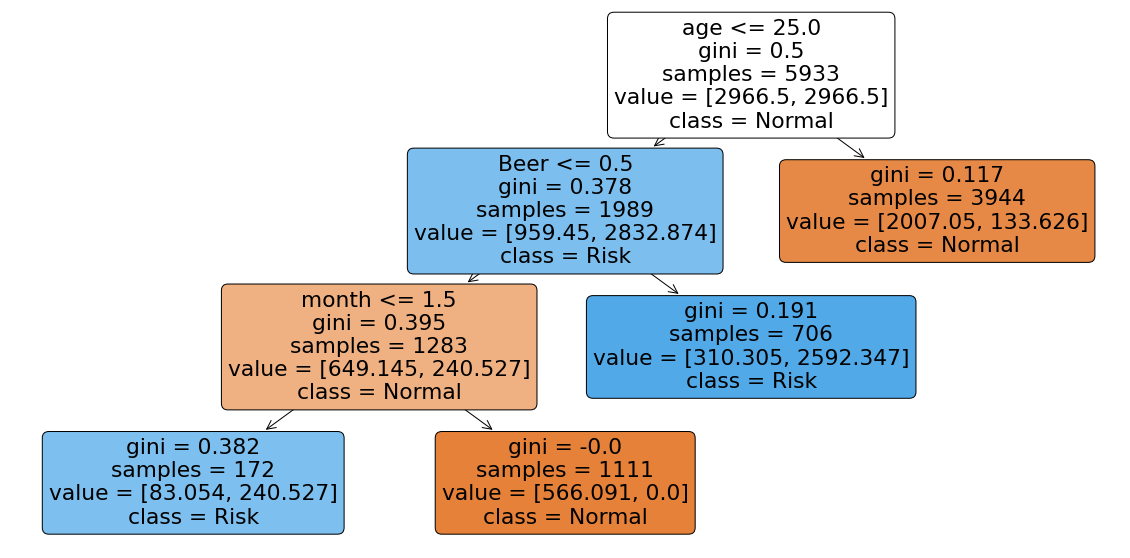

In [58]:

from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(cv.best_estimator_,filled=True,feature_names=X.columns,class_names=('Normal','Risk'),rounded=True)

In [59]:
len(df), len(df.query('age<=25')), len(df.query('age<=25 & Beer == True')), len(df.query('age<=25 & Beer != True & month == 1'))

(5933, 1989, 706, 172)

In [84]:
df2 = df.__deepcopy__()
df2['young'] = df2['age'] <= 25
counttable = pd.pivot_table(df2, 'ticketid', index=['young','Beer','month'], columns='target',aggfunc='count',margins=True)
percenttable = counttable / len(df)
percenttableRow = percenttable.div( percenttable.iloc[:,-1], axis=0 ).fillna(0)
percenttableRow.columns = [str(r) for r in percenttableRow.columns]
percenttableRow.style.background_gradient(cmap="Blues", subset=['True'])

In [77]:
import numpy as np
import pandas as pd
dft = pd.DataFrame(np.random.randn(15, 4), columns=list("ABCD"))
dft['E'] = 'abcdefghijklmn'
dft.style.background_gradient(cmap="Blues", subset='A')

,A,B,C,D,E
0,1.447817,1.451489,1.717501,-0.865975,abcdefghijklmn
1,-0.858974,-0.713483,-0.351050,0.354325,abcdefghijklmn
2,0.322254,-0.567797,-0.613831,-2.100911,abcdefghijklmn
3,0.874379,0.624423,0.208124,-0.024419,abcdefghijklmn
4,-0.630039,-0.641560,1.188370,0.967076,abcdefghijklmn
5,1.481997,1.391093,-1.244580,0.107224,abcdefghijklmn
6,0.920204,1.220023,-0.314463,-0.348119,abcdefghijklmn
7,-0.227303,0.836041,3.030413,-0.367236,abcdefghijklmn
8,-0.171187,1.066957,0.451044,-0.895200,abcdefghijklmn
9,1.355592,0.323448,-1.563829,-0.864438,abcdefghijklmn


In [70]:
np.random.randn()

-0.3676717257952739

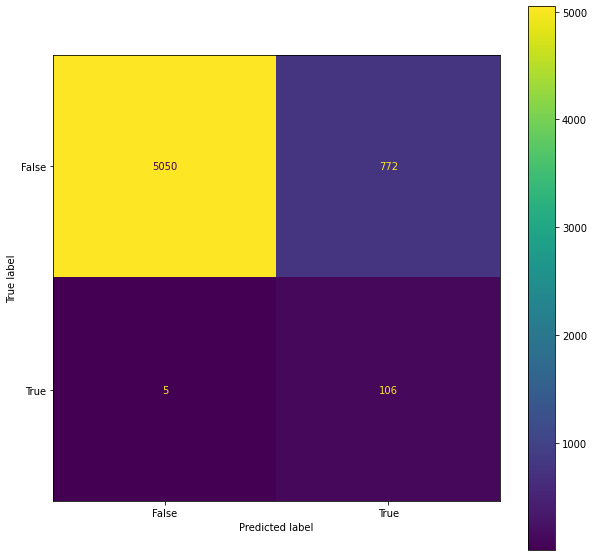

In [16]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(cv.best_estimator_, X, y, ax=ax,values_format = 'd')

In [17]:
df['predictions'] = cv.best_estimator_.predict(X)

In [18]:
df

,ticketid,person,age,seat,team,eventType,date,gate,products,target,Softdrink,Beer,Hotdog,Book,month,day,workday,predictions
0,61,Bethel Romy,32,A18,NaN,NaN,1900-01-25,A,"[Softdrink,Book]",False,True,False,False,True,1,25,3,False
1,103,Moreen Caren,29,A18,NaN,NaN,1900-02-20,A,"[Softdrink,Hotdog]",False,True,False,True,False,2,20,1,False
2,240,Ty Jenessa,33,A18,NaN,NaN,1900-02-02,A,"[Softdrink,Hotdog]",False,True,False,True,False,2,2,4,False
3,303,Bethel Romy,32,A18,NaN,NaN,1900-02-08,A,"[Book,Beer]",False,False,True,False,True,2,8,3,False
4,262,Karter Eppie,32,A18,NaN,NaN,1900-02-04,A,[Book],False,False,False,False,True,2,4,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5928,298,Mikayla Nevil,24,H1,NaN,NaN,1900-02-08,H,"[Hotdog,Beer]",False,False,True,True,False,2,8,3,True
5929,337,Carey Dakota,21,H1,NaN,NaN,1900-02-11,H,"[Hotdog,Beer]",False,False,True,True,False,2,11,6,True
5930,256,Melville Brenden,37,H1,NaN,NaN,1900-02-04,H,"[Hotdog,Beer]",False,False,True,True,False,2,4,6,False
5931,430,Tad Kathryn,29,H1,NaN,NaN,1900-02-19,H,"[Softdrink,Hotdog,Book,Beer]",False,True,True,True,True,2,19,0,False


In [19]:
df.query('predictions==True')

,ticketid,person,age,seat,team,eventType,date,gate,products,target,Softdrink,Beer,Hotdog,Book,month,day,workday,predictions
6,347,Carey Dakota,21,A18,NaN,NaN,1900-02-12,A,"[Hotdog,Beer]",False,False,True,True,False,2,12,0,True
7,151,Kade Fae,21,A18,NaN,NaN,1900-02-25,A,"[Hotdog,Beer]",False,False,True,True,False,2,25,6,True
11,293,Gertrude Jezza,20,A18,NaN,NaN,1900-02-07,A,"[Softdrink,Book,Beer]",False,True,True,False,True,2,7,2,True
28,466,Byrne Oralie,18,A18,NaN,NaN,1900-02-23,A,[Beer],False,False,True,False,False,2,23,4,True
40,50,Baxter Georgene,24,A18,NaN,NaN,1900-01-24,A,"[Hotdog,Beer]",False,False,True,True,False,1,24,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,399,Gertrude Jezza,20,H1,NaN,NaN,1900-02-16,H,"[Softdrink,Hotdog,Beer]",False,True,True,True,False,2,16,4,True
5920,250,Gertrude Jezza,20,H1,NaN,NaN,1900-02-03,H,[Beer],False,False,True,False,False,2,3,5,True
5926,0,Roseanne Winfield,23,H1,NaN,NaN,1900-01-19,H,"[Softdrink,Hotdog]",False,True,False,True,False,1,19,4,True
5928,298,Mikayla Nevil,24,H1,NaN,NaN,1900-02-08,H,"[Hotdog,Beer]",False,False,True,True,False,2,8,3,True


In [20]:
df.query('predictions==True & target ==True')

,ticketid,person,age,seat,team,eventType,date,gate,products,target,Softdrink,Beer,Hotdog,Book,month,day,workday,predictions
120,518,Oswin Tillie,24,A8,C,Eject,1900-02-25,A,[Beer],True,False,True,False,False,2,25,6,True
126,480,Sanjana Pooja,21,A8,C,Eject,1900-01-25,A,[Beer],True,False,True,False,False,1,25,3,True
139,510,Kortney Gord,20,A8,A,Knife,1900-02-19,A,[Beer],True,False,True,False,False,2,19,0,True
148,472,Kortney Gord,20,A8,A,Knife,1900-01-19,A,[Beer],True,False,True,False,False,1,19,4,True
200,516,Crispin Ralf,18,A6,B,Warning,1900-02-24,A,"[Softdrink,Beer]",True,True,True,False,False,2,24,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,505,Rachyl Roly,18,F9,C,Knife,1900-02-24,F,[Beer],True,False,True,False,False,2,24,5,True
4125,507,Mikayla Nevil,24,F8,B,Fight,1900-02-25,F,[Beer],True,False,True,False,False,2,25,6,True
4133,505,Rachyl Roly,18,F8,C,Knife,1900-02-24,F,[Beer],True,False,True,False,False,2,24,5,True
4362,507,Mikayla Nevil,24,F10,B,Fight,1900-02-25,F,[Beer],True,False,True,False,False,2,25,6,True
